In [1]:
!pip install ipynb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython import display

# dataset
from sklearn.datasets import load_breast_cancer

# preprocessamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# mlps
from sklearn.neural_network import MLPClassifier
from ipynb.fs.full.lib_ppgee_mlp import *

# Calculo das métricas
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
# carrega o dataset
cancer = load_breast_cancer()

# separa entre entrada(x) e saida(y)
X = cancer['data']
y = cancer['target']

# separa em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
# Cria um padronizador
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
skl_mlp = MLPClassifier(hidden_layer_sizes=(30))
skl_mlp.fit(X_train,y_train)


# MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
#        beta_2=0.999, early_stopping=False, epsilon=1e-08,
#       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
#       learning_rate_init=0.001, max_iter=200, momentum=0.9,
#       nesterovs_momentum=True, power_t=0.5, random_state=None,
#       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
#       verbose=False, warm_start=False)


MLPClassifier(hidden_layer_sizes=30)

In [6]:
# Adaptando a entrada e saída a nossa biblioteca
X = X_train
y = np.array([[c] for c in y_train])

# Configuracao da rede
layers = [30,30,1]
epochs = 200        
eta = 0.01

# Criacao do objeto e treinamento
ppgee_mlp = Neural_Network(layers=layers, epochs=epochs, eta=eta)
ppgee_mlp.train(X, y)

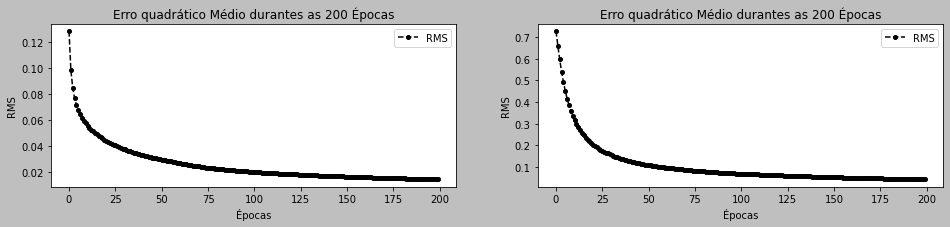

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16,3))

ax[0].set_title(f"Erro quadrático Médio durantes as {epochs} Épocas")
ax[0].set_xlabel("Épocas")
ax[0].set_ylabel("RMS")
ax[0].plot(ppgee_mlp.get_rms(), linestyle='--', marker='o', markersize = 4)
ax[0].legend(['RMS'])

ax[1].set_title(f"Erro quadrático Médio durantes as {epochs} Épocas")
ax[1].set_xlabel("Épocas")
ax[1].set_ylabel("RMS")
ax[1].plot(skl_mlp.loss_curve_, linestyle='--', marker='o', markersize = 4)
ax[1].legend(['RMS'])

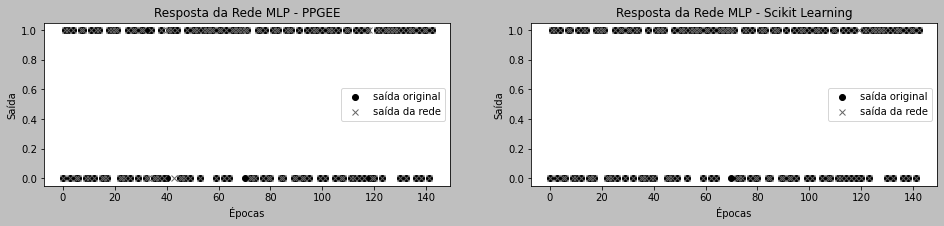

In [8]:
ppgee_predictions = np.round(ppgee_mlp.forward(X_test))
skl_predictions = skl_mlp.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize=(16,3))
ax[0].plot(y_test, 'o', label="saída original")
ax[0].set_title("Resposta da Rede MLP - PPGEE")
ax[0].set_xlabel("Épocas")
ax[0].set_ylabel("Saída")
ax[0].plot(ppgee_predictions, 'x',  label='saída da rede')
ax[0].legend()

ax[1].plot(y_test, 'o', label="saída original")
ax[1].set_title("Resposta da Rede MLP - Scikit Learning")
ax[1].set_xlabel("Épocas")
ax[1].set_ylabel("Saída")
ax[1].plot(skl_predictions, 'x',  label='saída da rede')
ax[1].legend()

In [9]:
print(confusion_matrix(y_test,skl_predictions))
print(classification_report(y_test,skl_predictions))

[[59  2]
 [ 0 82]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        61
           1       0.98      1.00      0.99        82

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [10]:
print(confusion_matrix(y_test,ppgee_predictions))
print(classification_report(y_test,ppgee_predictions))

[[58  3]
 [ 2 80]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        61
           1       0.96      0.98      0.97        82

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [11]:
# ppgee_mlp.saveWeights()